In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from collections import defaultdict
from src.plotting import plot_sim_evaluation_pv

import seaborn as sns
sns.set_theme(palette="colorblind")
sns.set_style("white", {'axes.grid': False})
color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']

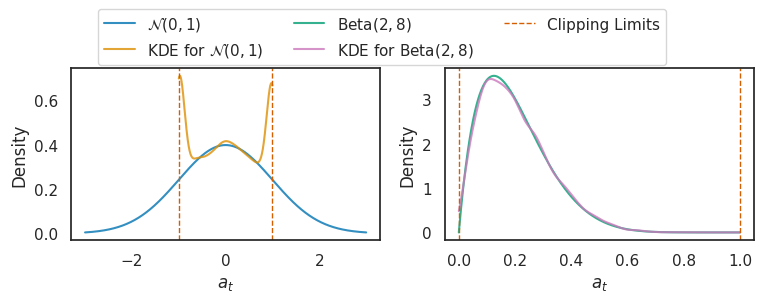

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm, beta, gaussian_kde

# Scale
m = 2.6
fig, ax = plt.subplots(
    1,
    2,
    figsize=(m * 3, m),
    tight_layout=True,
)

# --- Gaussian Distribution ---
mu, sigma = 0, 1
x_norm = np.linspace(-3, 3, 500)
pdf_norm = norm.pdf(x_norm, mu, sigma)
samples_norm = np.random.normal(mu, sigma, 10000)
# clipped_samples_norm = samples_norm[(samples_norm >= -1) & (samples_norm <= 1)]
clipped_samples_norm = np.clip(samples_norm, -1, 1)

kde_norm = gaussian_kde(clipped_samples_norm)
x_kde_norm = np.linspace(-1, 1, 500)
kde_values_norm = kde_norm(x_kde_norm)

ax[0].plot(x_norm, pdf_norm, label=r'$\mathcal{N}(0,1)$', alpha=0.8)
ax[0].plot(x_kde_norm, kde_values_norm, label=r'KDE for $\mathcal{N}(0,1)$', alpha=0.8)
# axs[0].legend()

ax[0].set_ylabel("Density")
ax[0].set_xlabel(r"$a_t$")

# --- Beta Distribution ---
a, b = 2, 8
x_beta = np.linspace(0, 1, 500)
pdf_beta = beta.pdf(x_beta, a, b)
samples_beta = np.random.beta(a, b, 10000)
# clipped_samples_beta = samples_beta[(samples_beta >= 0) & (samples_beta <= 1)]  # redundant but consistent
clipped_samples_beta = samples_beta

kde_beta = gaussian_kde(clipped_samples_beta)
x_kde_beta = np.linspace(0, 1, 500)
kde_values_beta = kde_beta(x_kde_beta)

ax[1].plot(x_beta, pdf_beta, label=r'$\text{Beta}(2,8)$', alpha=0.8, color=color_cycle[2])
ax[1].plot(x_kde_beta, kde_values_beta, label=r'KDE for $\text{Beta}(2,8)$', alpha=0.8, color=color_cycle[4])
ax[1].set_ylabel("Density")
ax[1].set_xlabel(r"$a_t$")
# axs[1].legend()


# show limits
c = color_cycle[-7]
ax[0].axvline(-1, color=c, linestyle='--', linewidth=1)
ax[0].axvline(1, color=c, linestyle='--', linewidth=1)

ax[1].axvline(0, color=c, linestyle='--', linewidth=1)
ax[1].axvline(1, color=c, linestyle='--', linewidth=1, label='Clipping Limits')

handles, labels = ax[0].get_legend_handles_labels()
h2, l2 = ax[1].get_legend_handles_labels()
handles += h2
labels += l2

fig.legend(handles, labels, loc="center", ncols=3, bbox_to_anchor=(0.5, 1.05))
# fig.subplots_adjust(wspace=-0.5)
fig.savefig("gauss-vs-beta.png", dpi=300, bbox_inches="tight")

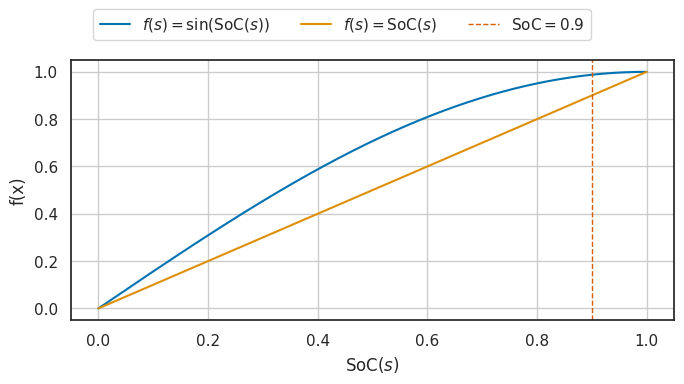

In [59]:
import numpy as np


m = 3.5#2.6
fig, ax = plt.subplots(
    1,
    1,
    figsize=(m * 2, m),
    tight_layout=True,
)


def f(x):
    return np.sin(x * (np.pi / 2))

def g(x):
    return x

x = np.linspace(0, 1, 500)

ax.plot(x, f(x), label=r'$f(s) = \sin(\text{SoC}(s))$')
ax.plot(x, g(x), label=r'$f(s) = \text{SoC}(s)$')
ax.set_xlabel(r'$\text{SoC}(s)$')
ax.set_ylabel('f(x)')
ax.axvline(0.9, color=c, linestyle='--', linewidth=1, label=r'$\text{SoC} = 0.9$')
ax.grid(True)

handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc="center", ncols=3, bbox_to_anchor=(0.5, 1.05))

fig.savefig("sinscale.png", dpi=300, bbox_inches="tight")